In [1]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from tqdm import tqdm_notebook
import re
import emoji
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
import time

/Users/lapislux/opt/anaconda3/envs/tf/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0


In [2]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def process_text(text):
    #pre rules
    res = text.lower().strip()
    res = replace_url(res)
    res = replace_rep(res)
    
    #tokenize
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    
    #post rules
    res = ungroup_emoji(res)
    
    return res
def convert(list):
     
    # Converting integer list to string list
    s = [str(i) for i in list]
     
    # Join list items using join()
    res = int("".join(s))
     
    return(res)

# Data preprocessing

##### -----ไม่แน่ใจว่าอยากให้ทำ train/valid จากไฟล์ train แล้วทำ blind Test จากไฟล์ test หรือแบ่งตามชื่อไฟล์ เลยทำตามชื่อไฟล์แล้วกันครับ -----

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.rename(columns={"class":"target"},inplace = True)
test_df.rename(columns={"class":"target"},inplace = True)

train_df
#test_df

,text,target
0,ทำงานคนหมู่มากความเห็นต่างเยอะไม่ออกความเห็นก็...,adl
1,ชอบโมโห ชอบขึ้นเสียง ชอบหัวร้อนใส่เขาจนทำให้เข...,guilt
2,"เมื่อด่นเดินหด้ใาล้มเมื่วันทร่,17ดย.สัโพกปักต...",adl
3,แต่ก่อนหนูตั้งใจทำงานมาก จดจ่อแต่กับเรื่องนั้น...,adl
4,แต่ก่อนเราชอบวาดรูปค่ะ ว่างก็วาด ทำงานเสร็จก็ว...,adl
...,...,...
295,ตอนนี้ผมต้องมาคอยดูแลผู้หญิงซึ่งไม่ใช่ญาติอะไร...,adl
296,รู้สึกว่าตัวเองทำอะไรเเล้วคนอื่นไม่เห็นด้วยค่ะ...,guilt
297,คือ หนูแชร์โพสในโซเชี่ยล แล้วทางแฟนของเราเขาลง...,guilt
298,เพราะงานหนัก เรียนหนัก เลยรู้สึกเหนื่อย บางทีถ...,adl


In [4]:
#Missing Value
#train_df.dropna()
#test_df.dropna()

In [5]:
#Imbalance Data set 
#train_df.target.value_counts()/train_df.shape[0]
#test_df.target.value_counts()/test_df.shape[0]

<Axes: >

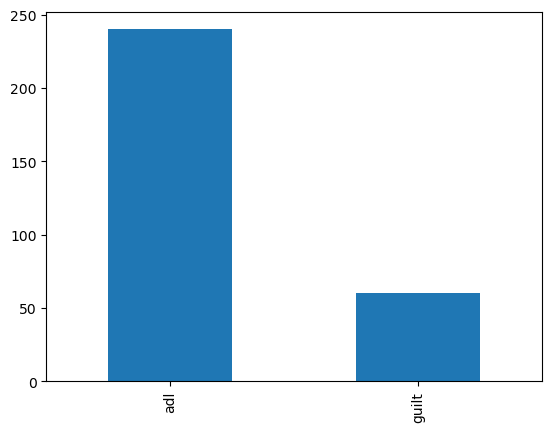

In [6]:
train_df.target.value_counts().plot(kind="bar")

<Axes: >

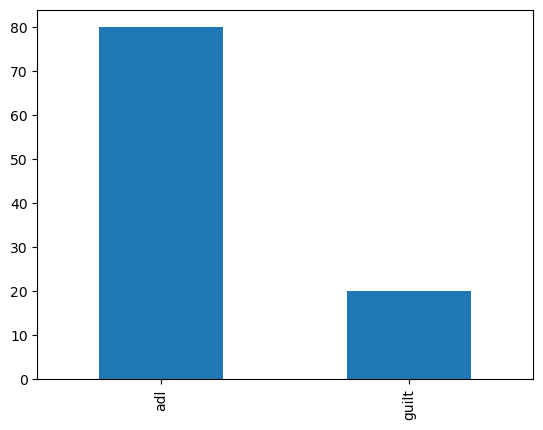

In [7]:
test_df.target.value_counts().plot(kind="bar")

In [8]:
#train
train_df['processed'] = train_df.text.map(lambda x: '|'.join(process_text(x)))
train_df['wc'] = train_df.processed.map(lambda x: len(x.split('|')))
train_df['uwc'] = train_df.processed.map(lambda x: len(set(x.split('|'))))

#test
test_df['processed'] = test_df.text.map(lambda x: '|'.join(process_text(x)))
test_df['wc'] = test_df.processed.map(lambda x: len(x.split('|')))
test_df['uwc'] = test_df.processed.map(lambda x: len(set(x.split('|'))))
train_df

,text,target,processed,wc,uwc
0,ทำงานคนหมู่มากความเห็นต่างเยอะไม่ออกความเห็นก็...,adl,ทำงาน|คน|หมู่|มาก|ความเห็น|ต่าง|เยอะ|ไม่|ออกคว...,22,20
1,ชอบโมโห ชอบขึ้นเสียง ชอบหัวร้อนใส่เขาจนทำให้เข...,guilt,ชอบ|โมโห|ชอบ|ขึ้นเสียง|ชอบ|หัว|ร้อน|ใส่|เขา|จน...,20,16
2,"เมื่อด่นเดินหด้ใาล้มเมื่วันทร่,17ดย.สัโพกปักต...",adl,"เมื่อ|ด่น|เดิน|หด้ใา|ล้ม|เม|ื่|วัน|ทร่|,17|ดย|...",47,45
3,แต่ก่อนหนูตั้งใจทำงานมาก จดจ่อแต่กับเรื่องนั้น...,adl,แต่ก่อน|หนู|ตั้งใจ|ทำงาน|มาก|จดจ่อ|แต่|กับ|เรื...,33,29
4,แต่ก่อนเราชอบวาดรูปค่ะ ว่างก็วาด ทำงานเสร็จก็ว...,adl,แต่ก่อน|เรา|ชอบ|วาดรูป|ค่ะ|ว่าง|ก็|วาด|ทำงาน|เ...,77,55
...,...,...,...,...,...
295,ตอนนี้ผมต้องมาคอยดูแลผู้หญิงซึ่งไม่ใช่ญาติอะไร...,adl,ตอนนี้|ผม|ต้อง|มา|คอย|ดูแล|ผู้หญิง|ซึ่ง|ไม่|ใช...,42,33
296,รู้สึกว่าตัวเองทำอะไรเเล้วคนอื่นไม่เห็นด้วยค่ะ...,guilt,รู้สึก|ว่า|ตัวเอง|ทำ|อะไร|เเล้ว|คนอื่น|ไม่|เห็...,19,17
297,คือ หนูแชร์โพสในโซเชี่ยล แล้วทางแฟนของเราเขาลง...,guilt,คือ|หนู|แชร์|โพส|ใน|โซ|เชี่ยล|แล้ว|ทาง|แฟน|ของ...,40,30
298,เพราะงานหนัก เรียนหนัก เลยรู้สึกเหนื่อย บางทีถ...,adl,เพราะ|งานหนัก|เรียน|หนัก|เลย|รู้สึก|เหนื่อย|บา...,22,21


In [9]:
tfidf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), min_df=10, sublinear_tf=True)
tfidf_fit = tfidf.fit(train_df['text'])

text_train = tfidf_fit.transform(train_df['text'])
test_feature = tfidf_fit.transform(test_df['text'])

text_train.shape, test_feature.shape

/Users/lapislux/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'


((300, 214), (100, 214))

In [10]:
x_train = text_train.toarray()
x_test = test_feature.toarray()

y_train = train_df['target']
y_test = test_df['target']


x_train.shape, x_test.shape

((300, 214), (100, 214))

###### ----------Data set มีปัญหา imbalance โดยปกติการเลือก OverSampling อาจทำให้เกิด Overfitting แต่เนื่องจากข้อมูลมีน้อยเกินไปและไม่สามารถหาข้อมูลจริงมาเพิ่มได้จึงต้องเลือก OverSampling ----------

In [11]:
import imblearn

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

X= x_train
y=train_df['target']

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X,y)

print(Counter(y_over))

Counter({'adl': 240, 'guilt': 240})


In [12]:
x_train = X_over
y_train = y_over

# Model and Parameter

In [21]:
time_start = time.time()

#----- KNN -----
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 100, 2)}

knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params)
knn_grid.fit(x_train, y_train)

print('KNN Best Score:', knn_grid.best_score_)
print('KNN Best Params:', knn_grid.best_params_)
print()

#----- Random Forest -----
forest = RandomForestClassifier(random_state=0)
forest_params = {
    'n_estimators': range(10, 100, 1),
    'criterion': ['entropy', 'gini'],
}
forest_grid = GridSearchCV(estimator=forest, param_grid=forest_params)
forest_grid.fit(x_train, y_train)

print ('Random Forest Best Score:', forest_grid.best_score_)
print ('Random Forest Best Params:', forest_grid.best_params_)
print()

#----- MultinomialNB -----
MNB = MultinomialNB()
MNB_params = {'alpha': np.arange(0.01,100,0.01)}

MNB_grid = GridSearchCV(estimator=MNB, param_grid=MNB_params)
MNB_grid.fit(x_train, y_train)

print('MultinomialNB Best Score:', MNB_grid.best_score_)
print('MultinomialNB Best Params:', MNB_grid.best_params_)
print()

#---- ComplementNB ----
CNB = ComplementNB()
CNB_params = {'alpha': np.arange(0.01,100,0.01)}

CNB_grid = GridSearchCV(estimator=CNB, param_grid=CNB_params,return_train_score=True)
CNB_grid.fit(x_train, y_train)

print('ComplementNB Best Score:', CNB_grid.best_score_)
print('ComplementNB Best Params:', CNB_grid.best_params_)
print()

#-----LinearSVC-----
LSVC = LinearSVC(max_iter =10000)
LSVC_params = {
    'C' : np.arange(0.01,100,0.01),
}
    
LSVC_grid = GridSearchCV(estimator=LSVC, param_grid=LSVC_params)
LSVC_grid.fit(x_train, y_train)

print('LinearSVC Best Score:', LSVC_grid.best_score_)
print('LinearSVC Best Params:', LSVC_grid.best_params_)
print()

#-----LogisticRegression-----
LR = LogisticRegression()
LR_params = {
    'C' : np.arange(0.01,100,0.01),
    #'penalty': ['l1', 'l2','elasticnet']
}
    
LR_grid = GridSearchCV(estimator=LR, param_grid=LR_params)
LR_grid.fit(x_train, y_train)

print('LogisticRegression Best Score:', LR_grid.best_score_)
print('LogisticRegression Best Params:', LR_grid.best_params_)
print()
#---------------------------------------

time_end = time.time()
print(f'Total Time: {time_end - time_start} - Second')

KNN Best Score: 0.9270833333333333
KNN Best Params: {'n_neighbors': 1}

Random Forest Best Score: 0.9833333333333334
Random Forest Best Params: {'criterion': 'gini', 'n_estimators': 56}

MultinomialNB Best Score: 0.9416666666666667
MultinomialNB Best Params: {'alpha': 0.01}

ComplementNB Best Score: 0.9416666666666667
ComplementNB Best Params: {'alpha': 0.01}

LinearSVC Best Score: 0.9416666666666667
LinearSVC Best Params: {'C': 3.01}

LogisticRegression Best Score: 0.9416666666666667
LogisticRegression Best Params: {'C': 3.4899999999999998}

Total Time: 1195.4772379398346 - Second


# Evaluation

In [22]:
print("--------------------------- KNN ---------------------------")
KNN_B = KNeighborsClassifier(n_neighbors = 1)
KNN_B.fit(x_train,y_train)
KNN_B.score(x_train,y_train)
test_pred = KNN_B.predict(test_feature)
print(classification_report(test_df['target'], test_pred))

--------------------------- KNN ---------------------------
              precision    recall  f1-score   support

         adl       0.89      0.88      0.88        80
       guilt       0.52      0.55      0.54        20

    accuracy                           0.81       100
   macro avg       0.70      0.71      0.71       100
weighted avg       0.81      0.81      0.81       100



In [23]:
print("--------------------- Random Forest -----------------------")
test_pred = forest_grid.predict(test_feature)
RF_B = RandomForestClassifier(criterion = 'gini', n_estimators=30)
RF_B.fit(x_train,y_train)
RF_B.score(x_train,y_train)
test_pred = RF_B.predict(test_feature)
print(classification_report(test_df['target'], test_pred))

--------------------- Random Forest -----------------------
              precision    recall  f1-score   support

         adl       0.94      0.96      0.95        80
       guilt       0.83      0.75      0.79        20

    accuracy                           0.92       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.92      0.92      0.92       100



In [24]:
print("------------------ Multinomial Naive Bayes -------------------")
MNB_B = MultinomialNB(alpha = 0.01)
MNB_B.fit(x_train,y_train)
MNB_B.score(x_train,y_train)
test_pred = MNB_B.predict(test_feature)
print(classification_report(test_df['target'], test_pred))

------------------ Multinomial Naive Bayes -------------------
              precision    recall  f1-score   support

         adl       0.97      0.89      0.93        80
       guilt       0.67      0.90      0.77        20

    accuracy                           0.89       100
   macro avg       0.82      0.89      0.85       100
weighted avg       0.91      0.89      0.90       100



In [25]:
print("------------------- Complement Naive Bayes--------------------")
CNB_B = ComplementNB(alpha = 0.01)
CNB_B.fit(x_train,y_train)
CNB_B.score(x_train,y_train)
test_pred = CNB_B.predict(test_feature)
print(classification_report(test_df['target'], test_pred))

------------------- Complement Naive Bayes--------------------
              precision    recall  f1-score   support

         adl       0.97      0.89      0.93        80
       guilt       0.67      0.90      0.77        20

    accuracy                           0.89       100
   macro avg       0.82      0.89      0.85       100
weighted avg       0.91      0.89      0.90       100



In [26]:
print("----------------------- LinearSVC -------------------------")
LSVC_B = LinearSVC(C = 3.01)
LSVC_B.fit(x_train,y_train)
LSVC_B.score(x_train,y_train)
test_pred = LSVC_B.predict(test_feature)
print(classification_report(test_df['target'], test_pred))

----------------------- LinearSVC -------------------------
              precision    recall  f1-score   support

         adl       0.93      0.94      0.93        80
       guilt       0.74      0.70      0.72        20

    accuracy                           0.89       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.89      0.89      0.89       100



In [27]:
print("------------------- LogisticRegression ---------------------")
LR_B = LogisticRegression(C = 3.4899999999999998)
LR_B.fit(x_train,y_train)
LR_B.score(x_train,y_train)
test_pred = LR_B.predict(test_feature)
print(classification_report(test_df['target'], test_pred))

------------------- LogisticRegression ---------------------
              precision    recall  f1-score   support

         adl       0.95      0.91      0.93        80
       guilt       0.70      0.80      0.74        20

    accuracy                           0.89       100
   macro avg       0.82      0.86      0.84       100
weighted avg       0.90      0.89      0.89       100



In [41]:
estimators = [#('KNN',KNN_B),
            ('RF',RF_B),
            #('MNB',MNB_B),
            #('CNB',CNB_B),
            ('LSVC',LSVC_B),
            ('LR',LR_B)]
clf = StackingClassifier(estimators=estimators,final_estimator=LR_B)
clf.fit(text_train, train_df['target'])
test_pred = clf.predict(test_feature)
print(classification_report(test_df['target'], test_pred))

              precision    recall  f1-score   support

         adl       0.94      0.97      0.96        80
       guilt       0.88      0.75      0.81        20

    accuracy                           0.93       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.93      0.93      0.93       100



In [42]:
sumlong = test_pred

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = y_test.to_numpy()
y_pred = test_pred
confusion_matrix(y_true, y_pred)

array([[78,  2],
       [ 5, 15]])

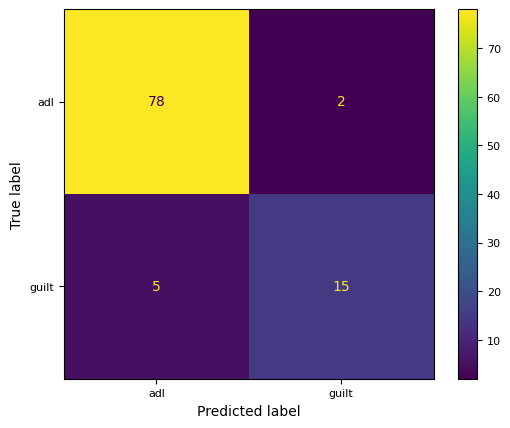

In [141]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()